# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path  = r'/Users/lupeguevara/Documents/DOE Demographic Snapshot'

In [4]:
path

'/Users/lupeguevara/Documents/DOE Demographic Snapshot'

In [5]:
# Importing cleaned dataset
doe = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'doe_demogr_location.pkl'))

# Data cleaning

In [6]:
doe.columns

Index(['District Borough Number', 'School Name', 'Year', 'Total Enrollment',
       'Grade PK (Half Day & Full Day)', 'Grade K', 'Grade 1', 'Grade 2',
       'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8',
       'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12', '% Female', '% Male',
       '% Asian', '% Black', '% Hispanic',
       '% Multiple Race Categories Not Represented', '% White',
       '% Students with Disabilities', '% English Language Learners',
       '% Poverty', 'Economic Need Index', 'Location_Category_Description',
       'Grades_final_text', 'primary_address_line_1', 'State_code',
       'X_COORDINATE', 'Y_COORDINATE', 'LONGITUDE', 'LATITUDE', 'NTA_Name',
       'coord'],
      dtype='object')

In [7]:
doe.head()

,District Borough Number,School Name,Year,Total Enrollment,Grade PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,...,Location_Category_Description,Grades_final_text,primary_address_line_1,State_code,X_COORDINATE,Y_COORDINATE,LONGITUDE,LATITUDE,NTA_Name,coord
0,01M015,P.S. 015 Roberto Clemente,2013-14,190,26,39,39,21,16,26,...,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
1,01M015,P.S. 015 Roberto Clemente,2014-15,183,18,27,47,31,19,17,...,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
2,01M015,P.S. 015 Roberto Clemente,2015-16,176,14,32,33,39,23,17,...,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
3,01M015,P.S. 015 Roberto Clemente,2016-17,178,17,28,33,27,31,24,...,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
4,01M015,P.S. 015 Roberto Clemente,2017-18,190,17,28,32,33,23,31,...,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"


In [8]:
doe.shape

(8860, 39)

In [9]:
# Rename the columns in the same way as in Exercise 6.2.

doe.rename(columns = {'Location_Category_Description' : 'Location', 'Grades_final_text': 'Grades', 'primary_address_line_1': 'Address', 'State_code': 'State', 'Y house price of unit area': 'Price per unit', 'NTA_Name' : 'Neighborhood', 'coord' : 'Coordinates' }, inplace = True)

In [10]:
doe.head()

,District Borough Number,School Name,Year,Total Enrollment,Grade PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,...,Location,Grades,Address,State,X_COORDINATE,Y_COORDINATE,LONGITUDE,LATITUDE,Neighborhood,Coordinates
0,01M015,P.S. 015 Roberto Clemente,2013-14,190,26,39,39,21,16,26,...,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
1,01M015,P.S. 015 Roberto Clemente,2014-15,183,18,27,47,31,19,17,...,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
2,01M015,P.S. 015 Roberto Clemente,2015-16,176,14,32,33,39,23,17,...,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
3,01M015,P.S. 015 Roberto Clemente,2016-17,178,17,28,33,27,31,24,...,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
4,01M015,P.S. 015 Roberto Clemente,2017-18,190,17,28,32,33,23,31,...,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"


In [11]:
# Check for missing values

doe.isnull().sum()

District Borough Number                       0
School Name                                   0
Year                                          0
Total Enrollment                              0
Grade PK (Half Day & Full Day)                0
Grade K                                       0
Grade 1                                       0
Grade 2                                       0
Grade 3                                       0
Grade 4                                       0
Grade 5                                       0
Grade 6                                       0
Grade 7                                       0
Grade 8                                       0
Grade 9                                       0
Grade 10                                      0
Grade 11                                      0
Grade 12                                      0
% Female                                      0
% Male                                        0
% Asian                                 

In [12]:
# Drop rows with missing values in specific columns
doe.dropna(subset=['X_COORDINATE', 'Y_COORDINATE', 'LONGITUDE', 'LATITUDE'], inplace=True)

# Check again for missing values to confirm
print(doe.isnull().sum())

District Borough Number                       0
School Name                                   0
Year                                          0
Total Enrollment                              0
Grade PK (Half Day & Full Day)                0
Grade K                                       0
Grade 1                                       0
Grade 2                                       0
Grade 3                                       0
Grade 4                                       0
Grade 5                                       0
Grade 6                                       0
Grade 7                                       0
Grade 8                                       0
Grade 9                                       0
Grade 10                                      0
Grade 11                                      0
Grade 12                                      0
% Female                                      0
% Male                                        0
% Asian                                 

In [13]:
doe.shape

(8855, 39)

In [14]:
# Duplicates check
dups = doe.duplicated()

In [15]:
dups.shape

(8855,)

#### No duplicates

# Extreme values checks

/var/folders/bw/cptkzcgn0rg6xj7czmdw2bl80000gn/T/ipykernel_7776/378095175.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(doe['Total Enrollment'], bins=25) # Shows extreme values


<Axes: xlabel='Total Enrollment', ylabel='Density'>

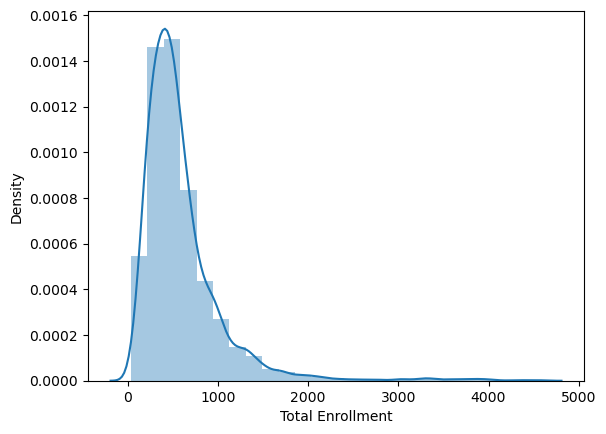

In [16]:
sns.distplot(doe['Total Enrollment'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [17]:
# Checking the mean
doe['Total Enrollment'].mean()

594.1132693393563

In [18]:
# Checking the median
doe['Total Enrollment'].median()

485.0

In [19]:
# Checking the max
doe['Total Enrollment'].max()

4582

# Data prep for regression analysis

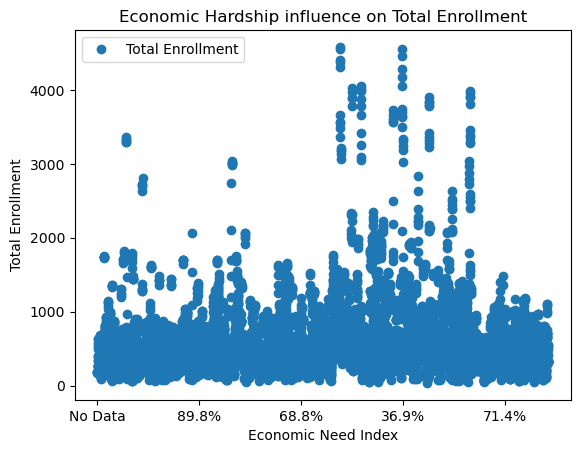

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

doe.plot(x = 'Economic Need Index', y='Total Enrollment',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Economic Hardship influence on Total Enrollment')  
plt.xlabel('Economic Need Index')  
plt.ylabel('Total Enrollment')  
plt.show()

#### There is discrepancy with the x axis 'Economic Need Index' is not a line of symmetry - explore further to correct 'No Data'.

In [21]:
doe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8855 entries, 0 to 8864
Data columns (total 39 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   District Borough Number                     8855 non-null   object 
 1   School Name                                 8855 non-null   object 
 2   Year                                        8855 non-null   object 
 3   Total Enrollment                            8855 non-null   int64  
 4   Grade PK (Half Day & Full Day)              8855 non-null   int64  
 5   Grade K                                     8855 non-null   int64  
 6   Grade 1                                     8855 non-null   int64  
 7   Grade 2                                     8855 non-null   int64  
 8   Grade 3                                     8855 non-null   int64  
 9   Grade 4                                     8855 non-null   int64  
 10  Grade 5          

In [22]:
#Checking how much 'No Data' is on the dataframe
no_data_count = (doe == 'No Data').sum().sum()
print("Number of 'No Data' values in the DataFrame:", no_data_count)

Number of 'No Data' values in the DataFrame: 1714


In [23]:
problematic_rows = doe[doe['Economic Need Index'] == 'No Data']
print(problematic_rows)

     District Borough Number                               School Name  \
0                     01M015                 P.S. 015 Roberto Clemente   
5                     01M019                       P.S. 019 Asher Levy   
10                    01M020                      P.S. 020 Anna Silver   
15                    01M034            P.S. 034 Franklin D. Roosevelt   
20                    01M063                 The STAR Academy - P.S.63   
...                      ...                                       ...   
8840                  84X705        Family Life Academy Charter School   
8845                  84X706             Harriet Tubman Charter School   
8850                  84X717                      Icahn Charter School   
8855                  84X718  Bronx Charter School for Better Learning   
8860                  84X730         Bronx Charter School for the Arts   

         Year  Total Enrollment  Grade PK (Half Day & Full Day)  Grade K  \
0     2013-14               190    

In [24]:
# Set the maximum number of columns to be displayed to None
pd.set_option('display.max_columns', None)

# Now display your DataFrame
print(doe)

     District Borough Number                        School Name     Year  \
0                     01M015          P.S. 015 Roberto Clemente  2013-14   
1                     01M015          P.S. 015 Roberto Clemente  2014-15   
2                     01M015          P.S. 015 Roberto Clemente  2015-16   
3                     01M015          P.S. 015 Roberto Clemente  2016-17   
4                     01M015          P.S. 015 Roberto Clemente  2017-18   
...                      ...                                ...      ...   
8860                  84X730  Bronx Charter School for the Arts  2013-14   
8861                  84X730  Bronx Charter School for the Arts  2014-15   
8862                  84X730  Bronx Charter School for the Arts  2015-16   
8863                  84X730  Bronx Charter School for the Arts  2016-17   
8864                  84X730  Bronx Charter School for the Arts  2017-18   

      Total Enrollment  Grade PK (Half Day & Full Day)  Grade K  Grade 1  \
0          

In [25]:
doe.head(30)

,District Borough Number,School Name,Year,Total Enrollment,Grade PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,% Female,% Male,% Asian,% Black,% Hispanic,% Multiple Race Categories Not Represented,% White,% Students with Disabilities,% English Language Learners,% Poverty,Economic Need Index,Location,Grades,Address,State,X_COORDINATE,Y_COORDINATE,LONGITUDE,LATITUDE,Neighborhood,Coordinates
0,01M015,P.S. 015 Roberto Clemente,2013-14,190,26,39,39,21,16,26,23,0,0,0,0,0,0,0,48.9,51.1,4.7,37.9,54.7,1.1,1.6,34.2,10.0,90.0,No Data,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
1,01M015,P.S. 015 Roberto Clemente,2014-15,183,18,27,47,31,19,17,24,0,0,0,0,0,0,0,45.9,54.1,4.4,35.5,58.5,0.5,1.1,35.0,9.3,92.3,93.5%,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
2,01M015,P.S. 015 Roberto Clemente,2015-16,176,14,32,33,39,23,17,18,0,0,0,0,0,0,0,47.2,52.8,5.1,32.4,59.7,1.7,1.1,34.1,9.1,84.7,89.6%,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
3,01M015,P.S. 015 Roberto Clemente,2016-17,178,17,28,33,27,31,24,18,0,0,0,0,0,0,0,46.6,53.4,7.9,28.7,59.0,2.2,2.2,28.7,6.7,85.4,89.2%,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
4,01M015,P.S. 015 Roberto Clemente,2017-18,190,17,28,32,33,23,31,26,0,0,0,0,0,0,0,52.1,47.9,10.5,27.4,57.9,1.1,3.2,23.7,4.2,84.7,89.0%,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
5,01M019,P.S. 019 Asher Levy,2013-14,285,36,39,38,36,45,47,44,0,0,0,0,0,0,0,49.5,50.5,14.4,19.6,51.9,3.5,10.5,31.2,8.8,74.7,No Data,Elementary,"PK,0K,01,02,03,04,05",185 1 AVENUE,NY,988547.0,205239.0,-73.984496,40.730009,East Village,"(40.730009, -73.984496)"
6,01M019,P.S. 019 Asher Levy,2014-15,270,30,44,40,39,35,40,42,0,0,0,0,0,0,0,48.9,51.1,11.1,17.4,58.5,3.0,10.0,30.4,6.7,74.1,60.9%,Elementary,"PK,0K,01,02,03,04,05",185 1 AVENUE,NY,988547.0,205239.0,-73.984496,40.730009,East Village,"(40.730009, -73.984496)"
7,01M019,P.S. 019 Asher Levy,2015-16,270,21,47,43,41,43,35,40,0,0,0,0,0,0,0,46.3,53.7,10.0,20.4,62.6,1.1,5.9,30.4,4.8,80.4,63.0%,Elementary,"PK,0K,01,02,03,04,05",185 1 AVENUE,NY,988547.0,205239.0,-73.984496,40.730009,East Village,"(40.730009, -73.984496)"
8,01M019,P.S. 019 Asher Levy,2016-17,271,24,37,46,47,40,43,34,0,0,0,0,0,0,0,46.9,53.1,8.9,18.8,66.4,0.4,5.5,32.5,3.3,76.4,58.2%,Elementary,"PK,0K,01,02,03,04,05",185 1 AVENUE,NY,988547.0,205239.0,-73.984496,40.730009,East Village,"(40.730009, -73.984496)"
9,01M019,P.S. 019 Asher Levy,2017-18,257,13,34,38,42,46,42,42,0,0,0,0,0,0,0,44.4,55.6,8.9,19.1,64.6,1.2,6.2,33.9,3.1,76.7,67.2%,Elementary,"PK,0K,01,02,03,04,05",185 1 AVENUE,NY,988547.0,205239.0,-73.984496,40.730009,East Village,"(40.730009, -73.984496)"


In [26]:
doe = doe[doe['Economic Need Index'] != 'No Data']

In [27]:
#Checking how much 'No Data' is on the dataframe
no_data_count = (doe == 'No Data').sum().sum()
print("Number of 'No Data' values in the DataFrame:", no_data_count)

Number of 'No Data' values in the DataFrame: 0


In [28]:
doe.head(30)

,District Borough Number,School Name,Year,Total Enrollment,Grade PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,% Female,% Male,% Asian,% Black,% Hispanic,% Multiple Race Categories Not Represented,% White,% Students with Disabilities,% English Language Learners,% Poverty,Economic Need Index,Location,Grades,Address,State,X_COORDINATE,Y_COORDINATE,LONGITUDE,LATITUDE,Neighborhood,Coordinates
1,01M015,P.S. 015 Roberto Clemente,2014-15,183,18,27,47,31,19,17,24,0,0,0,0,0,0,0,45.9,54.1,4.4,35.5,58.5,0.5,1.1,35.0,9.3,92.3,93.5%,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
2,01M015,P.S. 015 Roberto Clemente,2015-16,176,14,32,33,39,23,17,18,0,0,0,0,0,0,0,47.2,52.8,5.1,32.4,59.7,1.7,1.1,34.1,9.1,84.7,89.6%,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
3,01M015,P.S. 015 Roberto Clemente,2016-17,178,17,28,33,27,31,24,18,0,0,0,0,0,0,0,46.6,53.4,7.9,28.7,59.0,2.2,2.2,28.7,6.7,85.4,89.2%,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
4,01M015,P.S. 015 Roberto Clemente,2017-18,190,17,28,32,33,23,31,26,0,0,0,0,0,0,0,52.1,47.9,10.5,27.4,57.9,1.1,3.2,23.7,4.2,84.7,89.0%,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
6,01M019,P.S. 019 Asher Levy,2014-15,270,30,44,40,39,35,40,42,0,0,0,0,0,0,0,48.9,51.1,11.1,17.4,58.5,3.0,10.0,30.4,6.7,74.1,60.9%,Elementary,"PK,0K,01,02,03,04,05",185 1 AVENUE,NY,988547.0,205239.0,-73.984496,40.730009,East Village,"(40.730009, -73.984496)"
7,01M019,P.S. 019 Asher Levy,2015-16,270,21,47,43,41,43,35,40,0,0,0,0,0,0,0,46.3,53.7,10.0,20.4,62.6,1.1,5.9,30.4,4.8,80.4,63.0%,Elementary,"PK,0K,01,02,03,04,05",185 1 AVENUE,NY,988547.0,205239.0,-73.984496,40.730009,East Village,"(40.730009, -73.984496)"
8,01M019,P.S. 019 Asher Levy,2016-17,271,24,37,46,47,40,43,34,0,0,0,0,0,0,0,46.9,53.1,8.9,18.8,66.4,0.4,5.5,32.5,3.3,76.4,58.2%,Elementary,"PK,0K,01,02,03,04,05",185 1 AVENUE,NY,988547.0,205239.0,-73.984496,40.730009,East Village,"(40.730009, -73.984496)"
9,01M019,P.S. 019 Asher Levy,2017-18,257,13,34,38,42,46,42,42,0,0,0,0,0,0,0,44.4,55.6,8.9,19.1,64.6,1.2,6.2,33.9,3.1,76.7,67.2%,Elementary,"PK,0K,01,02,03,04,05",185 1 AVENUE,NY,988547.0,205239.0,-73.984496,40.730009,East Village,"(40.730009, -73.984496)"
11,01M020,P.S. 020 Anna Silver,2014-15,633,51,102,108,100,98,104,70,0,0,0,0,0,0,0,47.6,52.4,36.5,8.4,48.8,2.4,3.9,22.7,19.0,64.9,72.7%,Elementary,"PK,0K,01,02,03,04,05",166 ESSEX STREET,NY,988044.0,202068.0,-73.986312,40.721305,Chinatown,"(40.721305, -73.986312)"
12,01M020,P.S. 020 Anna Silver,2015-16,581,46,82,90,98,92,81,92,0,0,0,0,0,0,0,47.7,52.3,35.1,7.9,49.2,3.6,4.1,21.2,15.1,60.8,68.3%,Elementary,"PK,0K,01,02,03,04,05",166 ESSEX STREET,NY,988044.0,202068.0,-73.986312,40.721305,Chinatown,"(40.721305, -73.986312)"


In [29]:
# Remove '%' symbol and convert to numeric dtype
doe['Economic Need Index'] = doe['Economic Need Index'].str.replace('%', '').astype(float)

/var/folders/bw/cptkzcgn0rg6xj7czmdw2bl80000gn/T/ipykernel_7776/2251615086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doe['Economic Need Index'] = doe['Economic Need Index'].str.replace('%', '').astype(float)


In [30]:
# Rename the columns in the same way as in Exercise 6.2.

doe.rename(columns = {'Economic Need Index' : '% Economic Need Index'}, inplace = True)

/var/folders/bw/cptkzcgn0rg6xj7czmdw2bl80000gn/T/ipykernel_7776/1932130471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doe.rename(columns = {'Economic Need Index' : '% Economic Need Index'}, inplace = True)


In [31]:
doe.head(10)

,District Borough Number,School Name,Year,Total Enrollment,Grade PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,% Female,% Male,% Asian,% Black,% Hispanic,% Multiple Race Categories Not Represented,% White,% Students with Disabilities,% English Language Learners,% Poverty,% Economic Need Index,Location,Grades,Address,State,X_COORDINATE,Y_COORDINATE,LONGITUDE,LATITUDE,Neighborhood,Coordinates
1,01M015,P.S. 015 Roberto Clemente,2014-15,183,18,27,47,31,19,17,24,0,0,0,0,0,0,0,45.9,54.1,4.4,35.5,58.5,0.5,1.1,35.0,9.3,92.3,93.5,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
2,01M015,P.S. 015 Roberto Clemente,2015-16,176,14,32,33,39,23,17,18,0,0,0,0,0,0,0,47.2,52.8,5.1,32.4,59.7,1.7,1.1,34.1,9.1,84.7,89.6,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
3,01M015,P.S. 015 Roberto Clemente,2016-17,178,17,28,33,27,31,24,18,0,0,0,0,0,0,0,46.6,53.4,7.9,28.7,59.0,2.2,2.2,28.7,6.7,85.4,89.2,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
4,01M015,P.S. 015 Roberto Clemente,2017-18,190,17,28,32,33,23,31,26,0,0,0,0,0,0,0,52.1,47.9,10.5,27.4,57.9,1.1,3.2,23.7,4.2,84.7,89.0,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
6,01M019,P.S. 019 Asher Levy,2014-15,270,30,44,40,39,35,40,42,0,0,0,0,0,0,0,48.9,51.1,11.1,17.4,58.5,3.0,10.0,30.4,6.7,74.1,60.9,Elementary,"PK,0K,01,02,03,04,05",185 1 AVENUE,NY,988547.0,205239.0,-73.984496,40.730009,East Village,"(40.730009, -73.984496)"
7,01M019,P.S. 019 Asher Levy,2015-16,270,21,47,43,41,43,35,40,0,0,0,0,0,0,0,46.3,53.7,10.0,20.4,62.6,1.1,5.9,30.4,4.8,80.4,63.0,Elementary,"PK,0K,01,02,03,04,05",185 1 AVENUE,NY,988547.0,205239.0,-73.984496,40.730009,East Village,"(40.730009, -73.984496)"
8,01M019,P.S. 019 Asher Levy,2016-17,271,24,37,46,47,40,43,34,0,0,0,0,0,0,0,46.9,53.1,8.9,18.8,66.4,0.4,5.5,32.5,3.3,76.4,58.2,Elementary,"PK,0K,01,02,03,04,05",185 1 AVENUE,NY,988547.0,205239.0,-73.984496,40.730009,East Village,"(40.730009, -73.984496)"
9,01M019,P.S. 019 Asher Levy,2017-18,257,13,34,38,42,46,42,42,0,0,0,0,0,0,0,44.4,55.6,8.9,19.1,64.6,1.2,6.2,33.9,3.1,76.7,67.2,Elementary,"PK,0K,01,02,03,04,05",185 1 AVENUE,NY,988547.0,205239.0,-73.984496,40.730009,East Village,"(40.730009, -73.984496)"
11,01M020,P.S. 020 Anna Silver,2014-15,633,51,102,108,100,98,104,70,0,0,0,0,0,0,0,47.6,52.4,36.5,8.4,48.8,2.4,3.9,22.7,19.0,64.9,72.7,Elementary,"PK,0K,01,02,03,04,05",166 ESSEX STREET,NY,988044.0,202068.0,-73.986312,40.721305,Chinatown,"(40.721305, -73.986312)"
12,01M020,P.S. 020 Anna Silver,2015-16,581,46,82,90,98,92,81,92,0,0,0,0,0,0,0,47.7,52.3,35.1,7.9,49.2,3.6,4.1,21.2,15.1,60.8,68.3,Elementary,"PK,0K,01,02,03,04,05",166 ESSEX STREET,NY,988044.0,202068.0,-73.986312,40.721305,Chinatown,"(40.721305, -73.986312)"


In [32]:
# Convert 'Economic Need Index' to float64
doe['% Economic Need Index'] = doe['% Economic Need Index'].astype('float')

# Check the data types again to confirm the conversion
print(doe.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7141 entries, 1 to 8864
Data columns (total 39 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   District Borough Number                     7141 non-null   object 
 1   School Name                                 7141 non-null   object 
 2   Year                                        7141 non-null   object 
 3   Total Enrollment                            7141 non-null   int64  
 4   Grade PK (Half Day & Full Day)              7141 non-null   int64  
 5   Grade K                                     7141 non-null   int64  
 6   Grade 1                                     7141 non-null   int64  
 7   Grade 2                                     7141 non-null   int64  
 8   Grade 3                                     7141 non-null   int64  
 9   Grade 4                                     7141 non-null   int64  
 10  Grade 5          

/var/folders/bw/cptkzcgn0rg6xj7czmdw2bl80000gn/T/ipykernel_7776/2505089801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doe['% Economic Need Index'] = doe['% Economic Need Index'].astype('float')


In [33]:
doe.shape

(7141, 39)

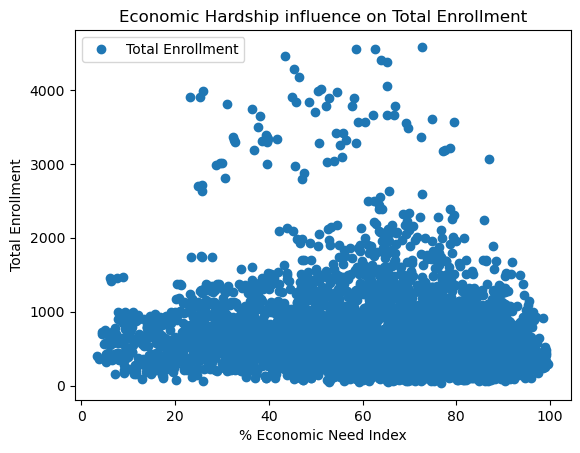

In [34]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

doe.plot(x = '% Economic Need Index', y='Total Enrollment',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Economic Hardship influence on Total Enrollment')  
plt.xlabel('% Economic Need Index')  
plt.ylabel('Total Enrollment')  
plt.show()

# Prepare variables for regression

In [35]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = doe['% Economic Need Index'].values.reshape(-1,1)
y = doe['Total Enrollment'].values.reshape(-1,1)

In [36]:
X

array([[93.5],
       [89.6],
       [89.2],
       ...,
       [80.6],
       [83.5],
       [88.3]])

In [37]:
y

array([[183],
       [176],
       [178],
       ...,
       [323],
       [320],
       [314]])

In [38]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression analysis

In [39]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [40]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [41]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

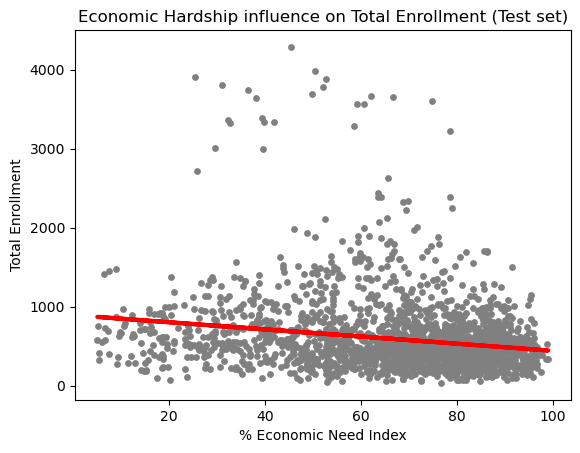

In [42]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Economic Hardship influence on Total Enrollment (Test set)')
plot_test.xlabel('% Economic Need Index')
plot_test.ylabel('Total Enrollment')
plot_test.show()

#### The regression line appears to have a negative regression meaning that the more economic hardship encountered means that enrollment is less than those without economic need. 

In [43]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [44]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-4.51848159]]
Mean squared error:  217839.59451044892
R2 score:  0.044612720202218625


In [45]:
y_predicted

array([[763.72430643],
       [549.54827927],
       [513.40042659],
       ...,
       [494.42280393],
       [481.31920733],
       [555.87415349]])

In [46]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,951,763.724306
1,1798,549.548279
2,338,513.400427
3,1221,575.303624
4,152,520.178149
5,747,742.939291
6,424,560.844483
7,620,483.578448
8,164,540.059468
9,201,470.926700


#### Predicted values did not perform well on the test set in many cases. This model is not good at predicting enrollment based on economic hardship.

### Compare how the regression fits the training set

In [47]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [48]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [49]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-4.51848159]]
Mean squared error:  198852.7005587747
R2 score:  0.040285775192810624


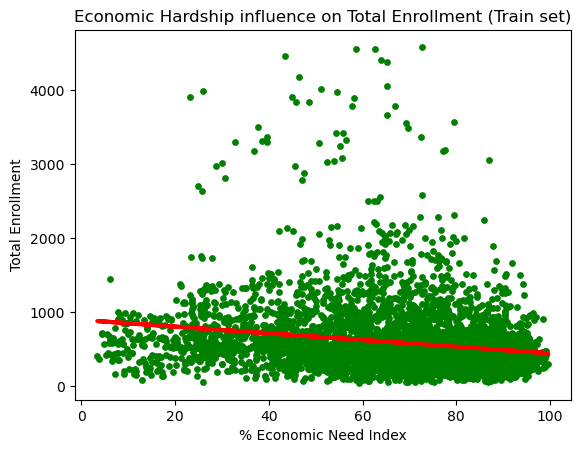

In [50]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Economic Hardship influence on Total Enrollment (Train set)')
plot_test.xlabel('% Economic Need Index')
plot_test.ylabel('Total Enrollment')
plot_test.show()

- Based on the visualization depicting the relationship between Economic Need Index and Total Enrollment in the training set, it appears that there is a slight downward trend in the regression line. This suggests that as the Economic Need Index increases, there tends to be a decrease in Total Enrollment.

- This downward regression may imply that schools with higher levels of economic hardship, as indicated by a higher Economic Need Index, may experience challenges in attracting and retaining students. Factors such as financial constraints, lack of resources, and socio-economic disparities could contribute to this trend.

### Performance improvement after removing outliers

In [51]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = doe[doe['Total Enrollment'] <=100] 

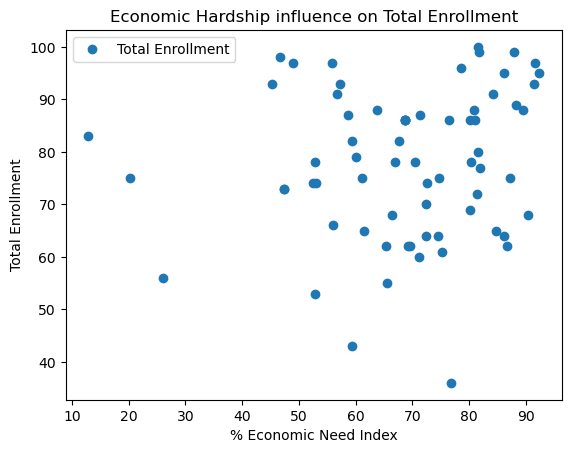

In [52]:
# See how the scatterplot looks without outliers.

df_test.plot(x = '% Economic Need Index', y='Total Enrollment', style='o')  
plt.title('Economic Hardship influence on Total Enrollment')  
plt.xlabel('% Economic Need Index')  
plt.ylabel('Total Enrollment')  
plt.show()

In [53]:
# Reshape again.

X_2 = df_test['% Economic Need Index'].values.reshape(-1,1)
y_2 = df_test['Total Enrollment'].values.reshape(-1,1)

In [54]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [55]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [56]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [57]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [58]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0150682]]
Mean squared error:  215.45740474950867
R2 score:  -0.015591563463662528


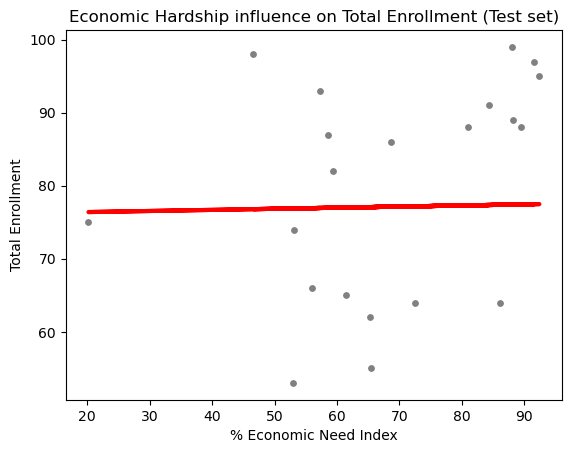

In [59]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Economic Hardship influence on Total Enrollment (Test set)')
plot_test.xlabel('% Economic Need Index')
plot_test.ylabel('Total Enrollment')
plot_test.show()

#### There is no regression in this instance and still indicate a poorly fitting model

In [60]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,53,76.884034
1,93,76.950334
2,66,76.930746
3,91,77.357176
4,62,77.070880
5,65,77.012114
6,64,77.384299
7,88,77.305944
8,74,76.887048
9,75,76.391304


In [61]:
#export file
doe.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'hardship_enrollment.pkl'))